In [29]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
import warnings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("car_price.csv")

In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
X = df.drop("price",axis=1)
y = df["price"]

In [33]:
X = sm.add_constant(df.drop("price",axis=1))
y = df['price']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     78.05
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           7.97e-71
Time:                        04:02:35   Log-Likelihood:                -1936.7
No. Observations:                 205   AIC:                             3903.
Df Residuals:                     190   BIC:                             3953.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.165e+04   1.57e+04     -3.299      0.001   -8.25e+04   -2.08e+04
symboling          285.8829    243.335      1.175      0.242    -194.101     765.867
wheelbase          167.6990    107.450      1.561      0.120     -44.250     379.648
carlength          -94.8179     55.502     -1.708      0.089    -204.297      14.661
carwidth           466.6185    247.995      1.882      0.061     -22.559     955.796
carheight          194.7522    138.223      1.409      0.160     -77.897     467.402
curbweight           1.8776      1.736      1.082      0.281      -1.546       5.301
enginesize         116.7820     13.831      8.443      0.000      89.500     144.064
boreratio         -984.4276   1194.709     -0.824      0.411   -3341.025    1372.169
stroke           -3056.1620    778.046     -3.928      0.000   -4590.881   -1521.443
compressionratio   286.4752     83.425      3.434      0.001     121.918     451.033
horsepower          32.5014     16.264      1.998      0.047       0.420      64.583
peakrpm              2.3582      0.670      3.518      0.001       1.036       3.680
citympg           -286.9397    179.856     -1.595      0.112    -641.710      67.831
highwaympg         191.3036    159.902      1.196      0.233    -124.108     506.716
==============================================================================
Omnibus:                       24.845   Durbin-Watson:                   0.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.581
Skew:                           0.412   Prob(JB):                     8.64e-18
Kurtosis:                       5.919   Cond. No.                     4.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">1)VIF (Variance Inflation Factor):
</h1>

In [6]:
df_vif_data = pd.DataFrame()
df_vif_data["Variable"] = X.columns
df_vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
df_vif_data["VIF"]
df_vif_data[df_vif_data["VIF"]>10].sort_values(ascending=False,by="VIF")


,Variable,VIF
3,carwidth,2828.144983
1,wheelbase,2254.716977
2,carlength,1893.738263
4,carheight,929.458469
13,highwaympg,511.133157
12,citympg,437.334307
5,curbweight,403.471933
7,boreratio,291.357019
11,peakrpm,219.618733
8,stroke,126.412487


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">2)Tolerans:
</h1>

In [7]:
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
tolerance_values = [1 / vif for vif in vif_values]
tolerance_data = pd.DataFrame({'Variable': X.columns, 'Tolerance': tolerance_values})
sorted_tolerance_data = tolerance_data.sort_values(by='Tolerance', ascending=False)
sorted_tolerance_data = pd.DataFrame(sorted_tolerance_data)
sorted_tolerance_data

,Variable,Tolerance
0,symboling,0.393558
9,compressionratio,0.063151
10,horsepower,0.015113
6,enginesize,0.014520
8,stroke,0.007911
11,peakrpm,0.004553
7,boreratio,0.003432
5,curbweight,0.002478
12,citympg,0.002287
13,highwaympg,0.001956


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">3)Korelasyon Matrisi İncelemesi:
</h1>

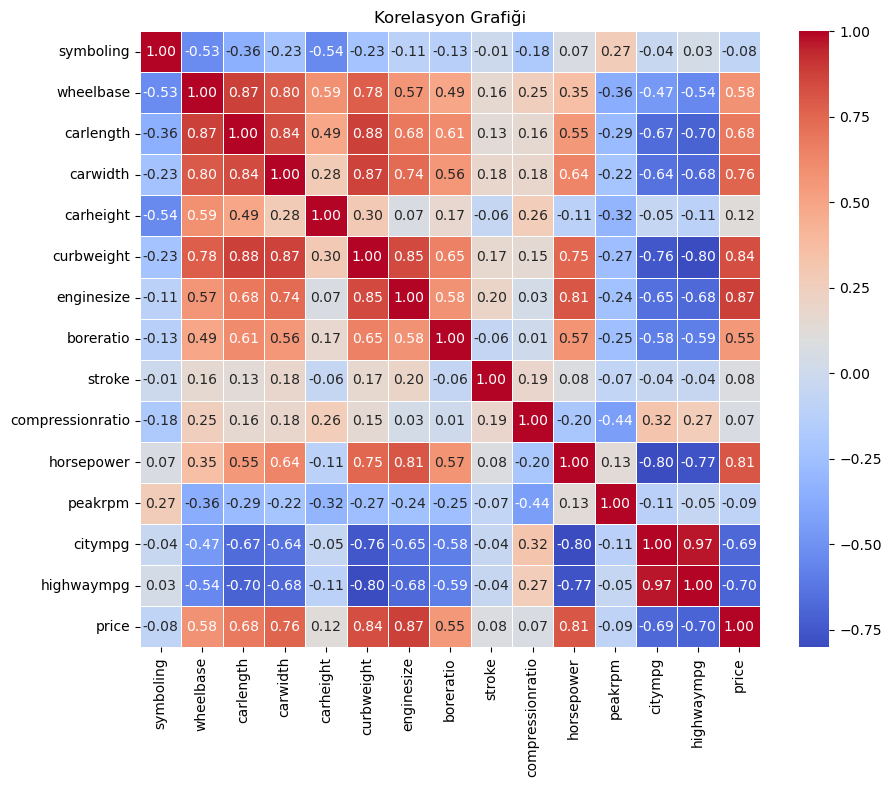

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelasyon Grafiği')
plt.show()

In [8]:
correlation_matrix = X.corr()

high_correlation_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            high_correlation_pairs.append(pair)
print("Korelasyonları 0.7'den büyük olan değişken çiftleri:")

for pair in high_correlation_pairs:
    i, j = correlation_matrix.columns.get_loc(pair[0]), correlation_matrix.columns.get_loc(pair[1])
    correlation_coefficient = correlation_matrix.iloc[i, j]
    print(f"{pair}: {correlation_coefficient:.2f}")

Korelasyonları 0.7'den büyük olan değişken çiftleri:
('wheelbase', 'carlength'): 0.87
('wheelbase', 'carwidth'): 0.80
('wheelbase', 'curbweight'): 0.78
('carlength', 'carwidth'): 0.84
('carlength', 'curbweight'): 0.88
('carlength', 'highwaympg'): -0.70
('carwidth', 'curbweight'): 0.87
('carwidth', 'enginesize'): 0.74
('curbweight', 'enginesize'): 0.85
('curbweight', 'horsepower'): 0.75
('curbweight', 'citympg'): -0.76
('curbweight', 'highwaympg'): -0.80
('enginesize', 'horsepower'): 0.81
('horsepower', 'citympg'): -0.80
('horsepower', 'highwaympg'): -0.77
('citympg', 'highwaympg'): 0.97


<h1 style="background-color:#FFA500;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">Principal Component Analysis
</h1>


Principal Component Analysis (PCA), çok değişkenli veri setlerindeki değişkenliği anlamak, veriyi daha az sayıda özellikle temsil etmek ve veri setindeki gizli yapıları ortaya çıkarmak amacıyla kullanılan bir istatistiksel bir tekniktir. Temel olarak, PCA, orijinal değişkenlerin lineer kombinasyonları olan yeni değişkenleri (bileşenleri) türetir ve bu bileşenlerin var olan değişkenliği mümkün olan en iyi şekilde açıklamasını amaçlar.
###### _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

###### PCA'nın temel adımları şunlardır:

######  Veri Standardizasyonu:
PCA, değişkenlerin ölçekleri arasındaki farklılıkları dengede tutmak için veriyi standartlaştırır. 

Bu adım, her değişkenin ortalamasını 0 ve standart sapmasını 1 yaparak gerçekleştirilir.

###### _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

######  Kovaryans Matrisinin Hesaplanması:
Veri setindeki değişkenler arasındaki ilişkileri anlamak için kovaryans matrisi hesaplanır. 

Kovaryans, iki değişkenin birlikte nasıl değiştiğini ölçer.
###### _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

######  Özdeğer ve Özvektörlerin Bulunması:
Kovaryans matrisinin özdeğerleri ve özvektörleri bulunur. 

Özdeğerler, her bir özvektörün ne kadar önemli olduğunu gösteren sayılardır. 

Özvektörler ise bu özdeğerlere karşılık gelen vektörlerdir.
###### _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

######  Bileşenleri Seçme:
Özdeğerler büyükten küçüğe sıralanır. En büyük özdeğerlere karşılık gelen özvektörler, yeni bileşenleri temsil eder. 

Genellikle, en yüksek özdeğerlere sahip ilk k bileşen seçilir, burada k, veriyi temsil etmek için kullanılacak yeni değişken sayısını ifade eder.
###### _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


######  Veri Dönüşümü:
Seçilen özvektörler kullanılarak orijinal veri seti, bu özvektörlerin lineer kombinasyonları olarak ifade edilen yeni bileşenlere dönüştürülür.


######  PCA'nın başlıca avantajlarından biri, veri setindeki değişkenlik yapısını anlamak ve bu değişkenliği daha az sayıda bileşenle temsil ederek modelin karmaşıklığını azaltmaktır. PCA, özellikle çok boyutlu veri setlerinde modelleme ve görselleştirme amacıyla sıkça kullanılan bir tekniktir.

In [9]:
scaler = StandardScaler()
df_standardized = scaler.fit_transform(X)

In [10]:
pca = PCA()
df_pca = pca.fit_transform(df_standardized)

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">Açıklanabilir Varyans Oranı Nedir ?
</h1>

###### Bir veri setiniz var ve bu veri seti beş özellik içeriyor: araçların motor hacmi, araç ağırlığı, yakıt tüketimi, hızlanma, ve fiyatı. Bu özellikleri içeren bir veri seti oldukça yüksek boyutlu olabilir.

###### PCA uyguladınız ve elde ettiğiniz sonuçlar şu şekilde:

Birinci bileşenin açıklanabilir varyans oranı: 0.6 (yani %60)
İkinci bileşenin açıklanabilir varyans oranı: 0.25 (yani %25)
Üçüncü bileşenin açıklanabilir varyans oranı: 0.1 (yani %10)
Geriye kalan bileşenlerin toplamı: 0.05 (yani %5)

Bu durumda, birinci bileşen genel değişkenliğin büyük bir kısmını (yaklaşık %60'ını) açıklar. İkinci bileşen, geriye kalan değişkenliğin önemli bir kısmını (%25) açıklar. Üçüncü bileşen ve sonraki bileşenler ise toplam varyansın daha küçük kısmını açıklar.

Eğer birinci ve ikinci bileşenleri kullanarak veriyi temsil ederseniz, toplam varyansın %85'ini (60% + 25%) açıklamış olursunuz. Bu, orijinal veri setinin önemli bir kısmını daha düşük boyutta temsil edebileceğiniz anlamına gelir.

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">Kümülatif Varyans Oranı Nedir ?
</h1>

###### Her bir bileşeni ekledikçe toplam varyansın nasıl değiştiğini gösteren bir dizi. Daha basit bir ifadeyle, sırasıyla her bileşeni eklediğinizde veri setinin ne kadarını açıkladığınızı gösterir. Bu oranlar bir araya geldiğinde, herhangi bir belirli bir bileşen sayısını seçerek toplam varyansın ne kadarını koruduğunuzu gösterir.

###### _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

###### Örnek
Birinci Bileşen Eklenince:

Kümülatif Varyans Oranı: 0.6

Bu, birinci bileşeni eklediğinizde toplam varyansın %60'ını açıkladığınız anlamına gelir.
###### _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

İkinci Bileşen Eklenince:


Kümülatif Varyans Oranı: 0.6, 0.85

İkinci bileşeni eklediğinizde toplam varyansın %85'ini açıklamış olursunuz.
###### _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


Üçüncü Bileşen Eklenince:

Kümülatif Varyans Oranı: 0.6, 0.85, 0.95

Üçüncü bileşeni eklediğinizde toplam varyansın %95'ini açıklamış olursunuz.
###### _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Geriye Kalan Bileşenler Eklenince:

Kümülatif Varyans Oranı: 0.6, 0.85, 0.95, 1.0

Tüm bileşenleri eklediğinizde toplam varyansın %100'ünü açıklamış olursunuz.

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">Hedeflenen Toplam Varyans Miktarı Nedir ?
</h1>

### Hedeflenen Toplam Varyans Miktarı Nedir ?


 PCA'da hedeflenen toplam varyans miktarını belirlemek, veri setinizin özelliklerine ve uygulama alanınıza bağlı olarak değişebilir. İşte bu kriterleri belirlemede ve değerlendirmede kullanabileceğiniz genel ilkeler:

###### Uygulama Alanı ve Problemin İhtiyaçları:

Veri setinizin kullanılacağı uygulama alanı ve problemin ihtiyaçları belirleyici olabilir. Örneğin, bir sınıflandırma modelinde belirli bir oranda varyansın korunması yeterli olabilirken, görüntü veya ses verileri üzerinde çalışıyorsanız daha yüksek bir varyans koruma oranı isteyebilirsiniz.
###### _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

###### Bilgi Kaybına Tolerans:

PCA, veri setindeki bilgiyi temsil etmek için daha az sayıda bileşeni kullanarak boyut azaltma yapar. Ancak, daha az bileşen kullanmak genellikle bir miktar bilgi kaybına neden olur. Tolerans seviyesini belirleyerek, ne kadar bilgi kaybına izin vermek istediğinizi değerlendirebilirsiniz.
###### _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

###### Grafik Analiz:

Açıklanan varyans oranı veya kümülatif varyans oranı grafikleri, belirli bir toplam varyans miktarını belirlemede yardımcı olabilir. "Elbow" noktası genellikle optimal bileşen sayısını temsil eder.
###### _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

###### Model Performansı:

Boyut azaltma işlemi, model performansını etkiler. Modelinizi belirli bir toplam varyans miktarıyla eğittikten sonra performansını değerlendirerek, bu miktarın yeterli olup olmadığını kontrol edebilirsiniz.
###### İşleme Maliyeti:

Daha fazla bileşen kullanmak, daha fazla işlem gücü gerektirir. Uygulama alanınıza bağlı olarak, işleme maliyetini düşünerek belirli bir bileşen sayısını seçebilirsiniz.
###### _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
###### _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

#### Hedef miktarı genel olarak %95 veya %99 seçilir.Hedef miktarı arttığında ya da azaldığında ne olur ?

###### Hedef Miktar Azalırsa:

Hedef miktarı azaltmak, daha az bileşenin kullanılmasını ve dolayısıyla daha küçük boyutlu bir temsil oluşturulmasını ifade eder.
Azalan hedef miktarı, modelinizi daha hızlı eğitme ve daha az işlem gücü kullanma avantajı sağlayabilir.
Ancak, düşük hedef miktarları modelinize daha az bilgi aktarabilir, bu da performans kaybına neden olabilir.
###### _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

###### Hedef Miktar Artarsa:

Hedef miktarını artırmak, daha fazla bileşenin korunmasını ve dolayısıyla daha büyük boyutlu bir temsil oluşturulmasını ifade eder.
Artan hedef miktarları, daha fazla bilgi koruma ve modelinizi daha iyi temsil etme avantajı sağlayabilir.
Ancak, artan boyutlar daha fazla işlem gücü gerektirir ve modelin eğitimini yavaşlatabilir.

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">Açıklanabilir Varyans Oranları
</h1>

In [11]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.48125521, 0.18648546, 0.09003325, 0.06695639, 0.04266764,
       0.03641421, 0.02952006, 0.02209862, 0.01855907, 0.00904765,
       0.00666664, 0.00526557, 0.00364343, 0.00138681])


###### - Birinci bileşenin açıklanabilir varyans oranı %48'dir
###### - İkinci bileşenin açıklanabilir varyans oranı %18'dir
###### - Üçüncü bileşenin açıklanabilir varyans oranı %09'dur

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">Kümülatif Varyans Oranları
   
</h1>

In [12]:
cumulative_variance_ratio = explained_variance_ratio.cumsum()
cumulative_variance_ratio

array([0.48125521, 0.66774067, 0.75777392, 0.8247303 , 0.86739794,
       0.90381214, 0.9333322 , 0.95543082, 0.97398989, 0.98303755,
       0.98970419, 0.99496976, 0.99861319, 1.        ])

###### - Birinci Bileşen Eklenince kümülatif Varyans Oranı 0.48'dur 

###### Bu, birinci bileşeni eklediğinizde toplam varyansın %48'unu açıkladığınız anlamına gelir.

###### _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

###### - İkinci Bileşen Eklenince kümülatif Varyans Oranı 0.66'dur 

###### Bu, ikinci bileşeni eklediğinizde toplam varyansın %66'sini açıkladığınız anlamına gelir.

###### _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

###### - Üçüncü Bileşen Eklenince kümülatif Varyans Oranı 0.75'dur 

###### Bu, üçüncü bileşeni eklediğinizde toplam varyansın %75'ini açıkladığınız anlamına gelir.

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">Grafik Yöntemi İle Optimal Bileşen Sayısını Belirleme
</h1>

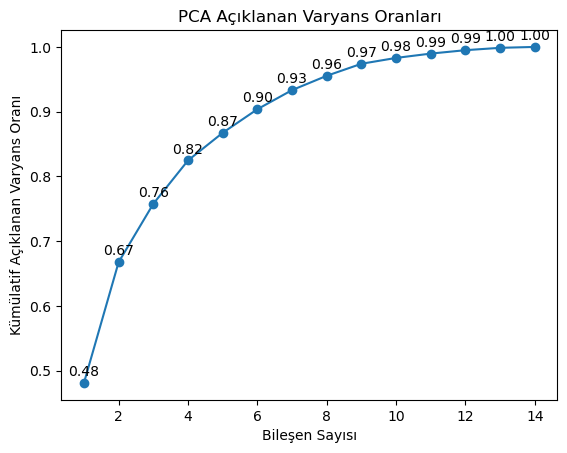

In [13]:
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')

for i, txt in enumerate(cumulative_variance_ratio):
    plt.annotate(f'{txt:.2f}', (i + 1, txt), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('PCA Açıklanan Varyans Oranları')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Kümülatif Açıklanan Varyans Oranı')
plt.show()

###### Örneğin hedef varyansımız %75 olsun . Noktaların üzerindeki değerlere bakarak 2-4 aralığındaki bir değerin optimal bileşen sayısı olduğunu gözlemleyebiliriz.

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">Optimal Bileşen Sayısı Nasıl Bulunur 
</h1>

###### Açıklanan varyans oranlarının toplamı hedef varyans oranı olan 0.95'e eşit ya da büyük olduğu ilk durumda döngü sonlanır ve optimal bileşen sayısı bulunur.

In [14]:
hedef_varyans = 0.95

toplam_varyans = 0
optimal_bilesen = 0

for i, ratio in enumerate(explained_variance_ratio):
    toplam_varyans += ratio
    optimal_bilesen += 1
    if toplam_varyans >= hedef_varyans:
        break

print(f"Optimal Bileşen Sayısı: {optimal_bilesen}")

Optimal Bileşen Sayısı: 8


###### Optimal Bileşen Sayısı Belirlendikten Sonra Neler Yapılır ?


In [15]:
optimal_components = 8

pca = PCA(n_components=optimal_components)

In [16]:
df_pca = pca.fit_transform(df_pca)


In [17]:
component_names = [f"PCA{i+1}" for i in range(optimal_components)]
df_pca = pd.DataFrame(df_pca, columns=component_names)

In [18]:
df_pca["price"] = y

In [19]:
df_pca

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,price
0,-0.909070,-2.604520,-0.051212,2.541878,0.147749,-0.118456,0.299096,-0.529229,13495.0
1,-0.909070,-2.604520,-0.051212,2.541878,0.147749,-0.118456,0.299096,-0.529229,16500.0
2,0.224935,-1.270311,-0.939355,-1.026228,-0.118033,0.206662,2.170157,0.610570,16500.0
3,-0.303762,-0.496016,-0.190757,-0.789240,0.876042,-0.743218,-0.026318,-0.037849,13950.0
4,1.027209,-1.409456,-0.002526,-0.914813,0.622000,-0.963806,0.434934,0.094522,17450.0
...,...,...,...,...,...,...,...,...,...
200,2.792484,0.907840,1.294312,-0.406451,0.048947,0.700932,-1.058520,-0.617821,16845.0
201,3.543331,0.262981,1.346860,-0.357060,-0.124699,0.737653,-0.883083,-0.302344,19045.0
202,3.437257,0.109367,1.885058,-0.298188,0.404373,1.018001,0.003004,-0.317734,21485.0
203,2.296397,3.161993,-1.163792,-0.697492,1.778258,1.063170,0.905037,-0.594917,22470.0


In [20]:
X = df_pca.drop("price",axis=1)

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">1)VIF (Variance Inflation Factor):
</h1>

###### PCA analizimiz sonrasında çoklu bağlantı probleminin ortadan kalktığını gözlemleyebiliriz.

In [23]:
df_vif_data = pd.DataFrame()
df_vif_data["Variable"] = X.columns
df_vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
df_vif_data["VIF"]
df_vif_data[df_vif_data["VIF"]>10].sort_values(ascending=False,by="VIF")


,Variable,VIF


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">2)Tolerans:
</h1>

In [24]:
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
tolerance_values = [1 / vif for vif in vif_values]
tolerance_data = pd.DataFrame({'Variable': X.columns, 'Tolerance': tolerance_values})
sorted_tolerance_data = tolerance_data.sort_values(by='Tolerance', ascending=False)
sorted_tolerance_data = pd.DataFrame(sorted_tolerance_data)
sorted_tolerance_data

,Variable,Tolerance
1,PCA1,1.0
5,PCA5,1.0
8,PCA8,1.0
0,const,1.0
2,PCA2,1.0
4,PCA4,1.0
6,PCA6,1.0
7,PCA7,1.0
3,PCA3,1.0


###### Tolerans değerlerinin 1 olması çoklu bağlantı problemi olmadığını belirtir.

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">3)Korelasyon Matrisi İncelemesi:
</h1>

In [25]:
correlation_matrix = X.corr()

high_correlation_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            high_correlation_pairs.append(pair)
print("Korelasyonları 0.7'den büyük olan değişken çiftleri:")

for pair in high_correlation_pairs:
    i, j = correlation_matrix.columns.get_loc(pair[0]), correlation_matrix.columns.get_loc(pair[1])
    correlation_coefficient = correlation_matrix.iloc[i, j]
    print(f"{pair}: {correlation_coefficient:.2f}")

Korelasyonları 0.7'den büyük olan değişken çiftleri:


###### Korelasyonları 0.7'den büyük olan hiçbir değişken bulunmamaktadır

In [27]:
df_pca.corr().sort_values(ascending=False,by="price")["price"]

price    1.000000
PCA1     0.831053
PCA6     0.200087
PCA8     0.182248
PCA5     0.113655
PCA7     0.106079
PCA4     0.080062
PCA3    -0.128241
PCA2    -0.162450
Name: price, dtype: float64

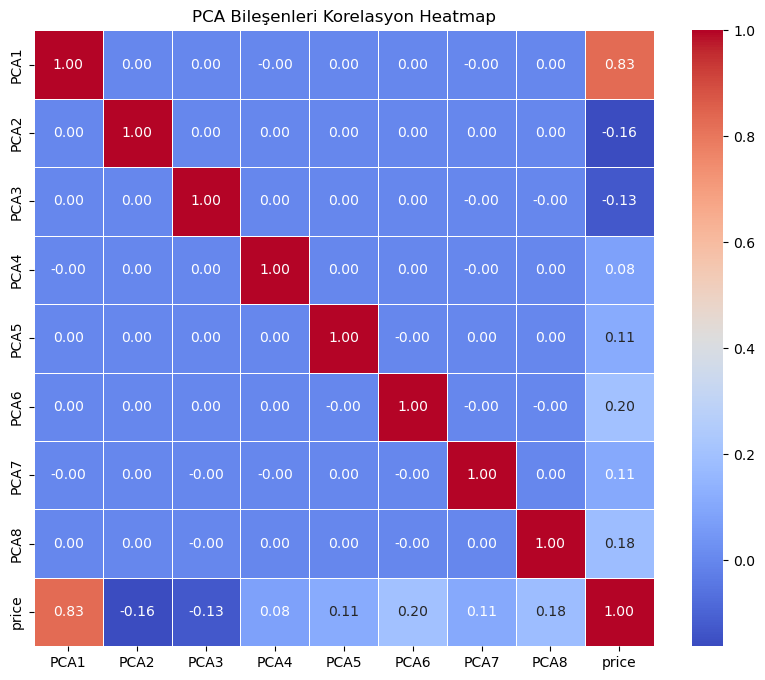

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_pca.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('PCA Bileşenleri Korelasyon Heatmap')
plt.show()

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">PCA SONRASI MODEL ÖZETİ DEĞERLENDİRME
</h1>

###### PCA analizi sonrasında kurulan modelde modelin $R^2$ başarısının orijinal veri setinde göre düştüğünü gözlemleyebiliriz.

In [22]:
X = sm.add_constant(df_pca.drop("price",axis=1))
y = df_pca['price']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     126.1
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           5.08e-73
Time:                        03:51:38   Log-Likelihood:                -1946.3
No. Observations:                 205   AIC:                             3911.
Df Residuals:                     196   BIC:                             3941.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.328e+04    229.599     57.826      0.000    1.28e+04    1.37e+04
PCA1        2551.5224     88.454     28.846      0.000    2377.078    2725.967
PCA2        -801.2273    142.097     -5.639      0.000   -1081.462    -520.993
PCA3        -910.2978    204.505     -4.451      0.000   -1313.612    -506.984
PCA4         659.0045    237.143      2.779      0.006     191.325    1126.684
PCA5        1171.9181    297.069      3.945      0.000     586.056    1757.780
PCA6        2233.2722    321.567      6.945      0.000    1599.097    2867.447
PCA7        1315.0075    357.148      3.682      0.000     610.662    2019.353
PCA8        2611.1873    412.785      6.326      0.000    1797.117    3425.258
==============================================================================
Omnibus:                       21.528   Durbin-Watson:                   0.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.408
Skew:                           0.396   Prob(JB):                     3.42e-13
Kurtosis:                       5.468   Cond. No.                         4.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Prob (F-statistic) istatistiği incelendiğinde modelin anlamlı olduğunu söyleyebiliriz.

###### P > t değerleri incelendiğinde bütün değişkenlerin model için anlamlı olduğunu söyleyebiliriz.